# Titanic Survival Prediction with Ensemble Modeling



## Data Science Framework
1. **Define the Problem:** The first step in any investigation is to clearly define the problem that you are trying to solve. What questions are you trying to answer? What data and insights to you need?
2. **Clean and Transform the Data:** The quality of your analysis will depend heavily on the quality of the data you have available. Data wrangling includes implementing data architectures for storage and processing, developing data governance standards for quality and control, data extraction (i.e. ETL and web scraping), and data cleaning to identify aberrant, missing, or outlier data points.
3. **Perform Exploratory Data Analysis:**  EDA is essentially using statistical techniques to understand the essential characteristics and relationships in the data that you are working with. It can also help you understand what hypotheses you might be able to test and what assumptions might be invalid an any predictive model that you select.

4. **Feature Engineering** Feature engineering is where we create the features that we believe will be useful in predicting the target value for our model. We essentially take what we have learned about the data in EDA and create variables that will go into our modeling equations. This step typically also involves scaling the data so that they are easier for the ML algorithms to work with and splitting the datasets into train-test-validation subsets that we will use to evaluate the different models.
5. **Model Creation:** Here we will be creating a number of different models each with slightly different numerical approaches and characteristics. The models that are selected depend on the kinds of relationships that you expect to see based on the EDA. For example, are the relationships linear or nonlinear. After the models have been created, we run the estimation algorithm on them to produce objects that can be used for prediction and evaluation. 
6. **Model Validation:** After you've trained your model based on a subset of your data, it's time to test your model. This helps ensure you haven't overfit your model or made it so specific to the selected subset, that it does not accurately fit another subset from the same dataset. In this step we determine if our [model overfit, generalize, or underfit our dataset](http://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html).
7. **Model Optimization:** This is where you iterate back through the modeling again changing parameters in the estimation to try to maximize the model's predictive ability. For our example, we will do hyperparameter optimization with use grid search to evaluate common values.

## Introduction

<a id="Introduction"></a>

<a id="1"></a>
### Define the Problem

#### Predict the survival of a passenger on the Titanic
......

**Summary:**
The sinking of the Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

------------------------------------


## Content

1. [Introduction](#Introduction)
1. [Ingest Data](#Ingest)
    1. [load data](#loaddata)
    1. [outlier detection](#outliers)
    1. [join train and test](#joindata)
    1. [find missing and null values](#missing)
1. [Exploratory Data Analysis (EDA)](#eda)
    1. [numerical features](#nf)
    1. [categorical features](#cf)
1. [Fix missing data](#fixmissing)
1. [Feature Engineering](#featureeng)
    1. [name](#name)
    1. [family size](#family)
    1. [cabin](#cabin)
    1. [ticket](#ticket)
1. [Single Models](#models)
    1. [model creation](#modelcreate)
    1. [cross-validation](#cv)
    1. [hyperparameter tuning](#ht)
    1. [learning curves](#lc)
    1. [feature importance](#fi)
1. [Ensemble Model](#ensemble)
1. [Predict](#pred)




In [1]:
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
#  needs matplotlib-3.1.1
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')


# Sci-kit Learn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


from collections import Counter

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="ingest"></a>
## 2. Ingest and check data
###  Load data
<a id="loaddata"></a>

In [2]:
# Load data
##### Load train and Test set

train = pd.read_csv("./data/titanic/train.csv")
test = pd.read_csv("./data/titanic/test.csv")
IDtest = test["PassengerId"]

In [3]:
# Let's have a quick look
print("Row, Columns:", train.shape)
print(train.info())
train.head()

Row, Columns: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## So what can we see??
We can see that there are **12 features**. And each feature has **891 observations.**

**Numerical Features:** PassengerId, Survived, Pclass, Age, Sibsp, Parch and Fare

**Text features:** Name, Sex, Ticket, Cabin and Embarked

**Target Feature:** Survived

### Features:
1. **PassengerId** is a unique identifying number assigned to each passenger.
2. **Survived** is a flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
3. **Pclass** is the passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. **Name** is the name of the passenger.
5. **Sex** indicates the gender of the passenger (i.e., Male or female).
6. **Age** indicates the age of the passenger.
7. **Sibsp**  is the number of siblings/spouses aboard.
8. **Parch** is the number of parents/children aboard.
9. **Ticket** indicates the ticket number issued to the passenger.
10. **Fare** indicates the amount of money spent on their ticket.
11. **Cabin** indicates the cabin category occupied by the passenger.
12. **Embarked** indicates the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).

### Quick look at summary statistics

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2 Outlier detection
<a id="outliers"></a>

In [5]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

This function uses the Tukey method to detect ouliers. This method defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR). An outlier is a row that have a feature value outside the (IQR +- an outlier step).

**I flag a row as an outlier if it has outliers in at least two features.**

In [6]:
train.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S



We detect 10 outlier rows. 

Ticket Fare and SibSp have the rows with the biggest outliers.


In [7]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

### 2.3 Joining train and test set

In [8]:
## Join train and test datasets in order to obtain the same number of features during categorical conversion
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

We are cheating a bit here. We are joining the train and test datasets so that we can to the transforms on both at the same time. We would typically set up a pipeline and then run each data set through it separately.

### 2.4 Check for null and missing values

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

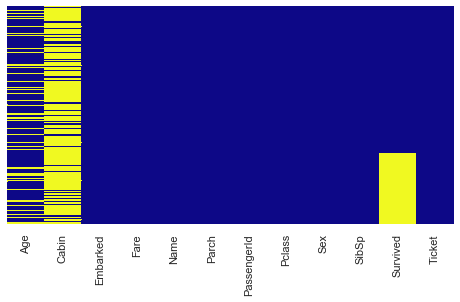

In [9]:
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

# Visualization of Missing variables
plt.figure(figsize=(8,4))
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='plasma')

# Check for Null values
dataset.isnull().sum()

The Age and Cabin features have several missing values. Fare and Embarked also have a few missing values.

**The Survived missing values correspond to the values from the test data set**

<a id="eda"></a>
## 3. Exploratory Data Analysis

<a id="nf"></a>
### 3.1 Numerical values

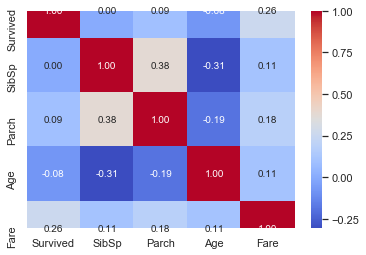

In [10]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

From the numerical features, only Fare seems to have a significant correlation with the survival probability.

It doesn't mean that the other features are not useful. Sub-populations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

#### SibSP (# of siblings/spouses)

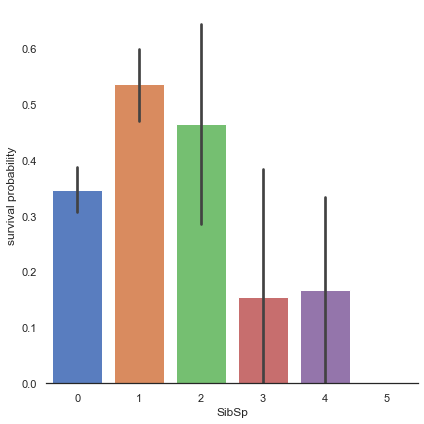

In [11]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive

Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive


#### Parch (# of parents/children)

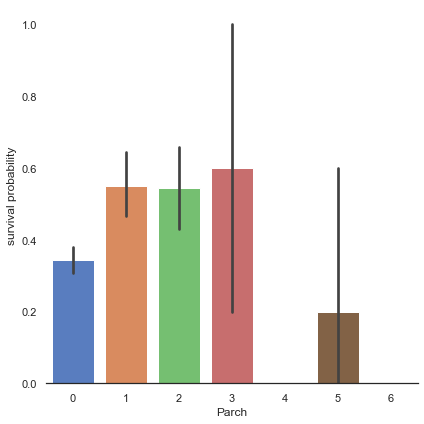

In [12]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Mid-sized families have higher survival rates with single and large families having the highest mortality

Note that the variance in survival rates also tends to increase with Parch

#### Age

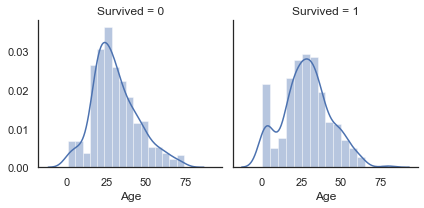

In [13]:
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")



Age distributions seem fairly gaussian distribution.

We notice that age distributions are not symmetric between those who survived and those who died.

Young children and people in their twenties have higher survival rates. The elderly people had significantly less chance.

Age by itself might not be very significant but it might interesting to bin the passengers by age and use that as a feature.

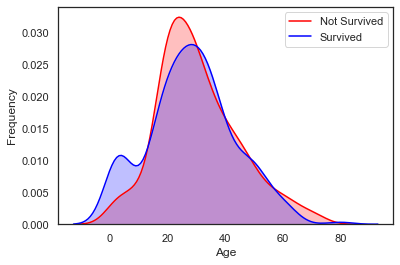

In [14]:
# Explore Age distibution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

The increased survival of the young and mortality of the elderly is even more apparent when we overlay the two populations.

#### Fare

In [15]:
# How many null values in Fare?
dataset["Fare"].isnull().sum()

1

In [16]:
#Fill Fare missing values with the median value
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

Since we only have one missing value, let's just fill it with the median value and move on.

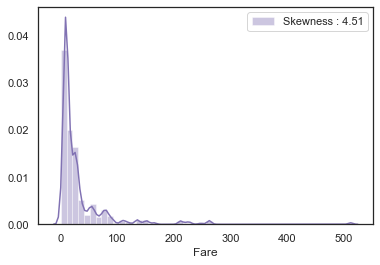

In [17]:
# Explore Fare distribution 
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

As we can see, Fare distribution is very skewed. This can lead to the model focusing on the high valued outliers even if the vales are re-scaled. 

Here we will use a log function to reduce the level of skew.

In [18]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

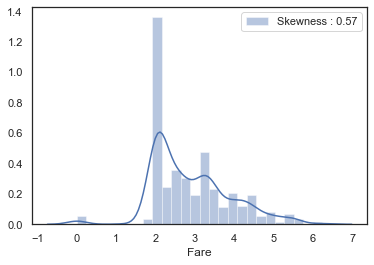

In [19]:
g = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

Still some skew, but much better.

<a id="cf"></a>
### 3.2 Categorical features
#### Sex

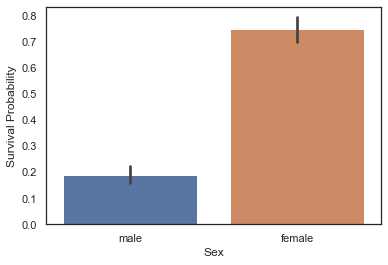

In [20]:
# How did survival differ by sex?
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")

In [21]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


Obviously, women fared better than men.

Sex will likely play a big role in our model.

#### Pclass (Passenger class)

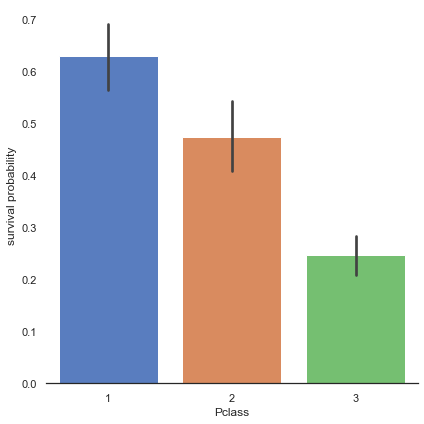

In [22]:
# Explore Pclass vs Survived
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

People in the better cabins had significantly higher chances to survive.

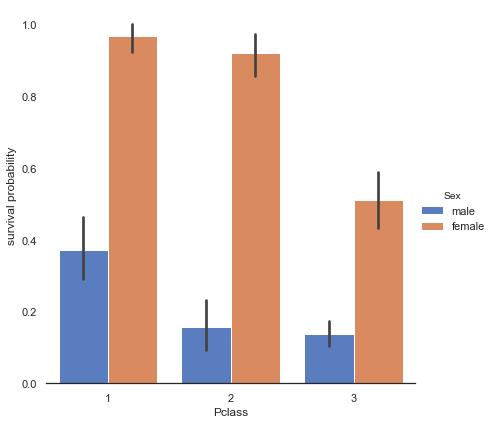

In [23]:
# Explore Pclass vs Survived by Sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

This trend is still true when we look at both male and female passengers.

#### Embarked (Port where they got on)

In [24]:
dataset["Embarked"].isnull().sum()

2

In [25]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

We only have two missing values, let's just fill them with the most frequent value which is "S".

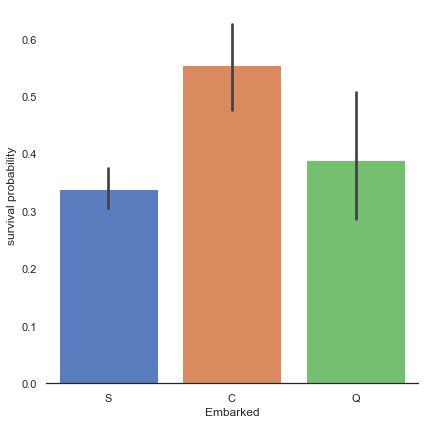

In [26]:
# Explore Embarked vs Survived 
g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passengers coming from Cherbourg (C) have more chance to survive.

My hypothesis is that the proportion of first class passengers is higher for those who came from Cherbourg than Queenstown (Q), Southampton (S).

Let's see the Pclass distribution by where they Embarked

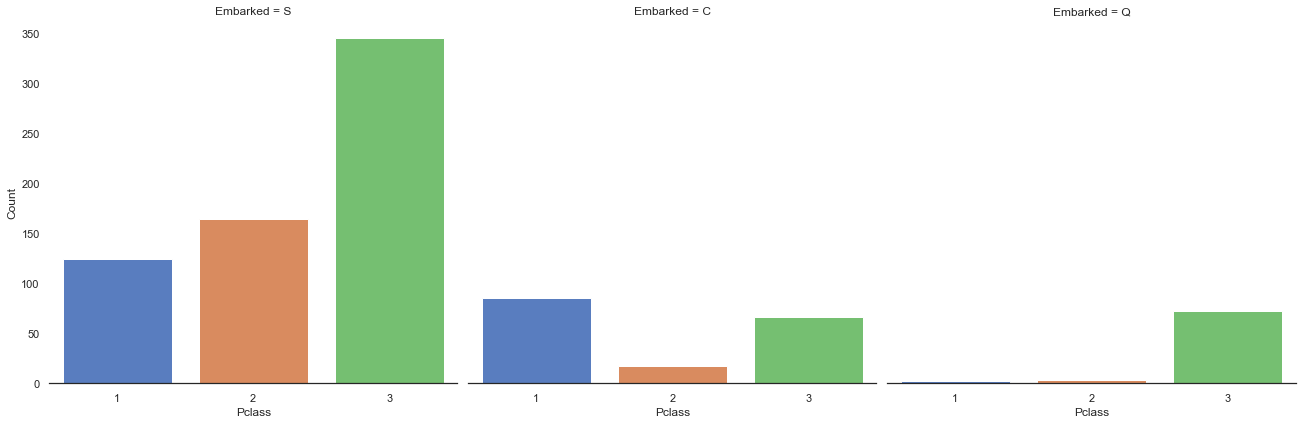

In [27]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked",  data=train,
                   size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

Indeed, the third class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q), whereas Cherbourg passengers are mostly in first class which have the highest survival rate.


<a id="fixmissing"></a>
## 4. Filling missing Values
### 4.1 Age

As we previously saw, the Age column contains 256 missing values in the whole dataset.

Since there is subpopulations that have more chance to survive, it is preferable to keep the age feature and to impute the missing values. 

**To address this problem, let's look at the features that were most correlated to Age and see if we can use them to guess at a good value for age.**

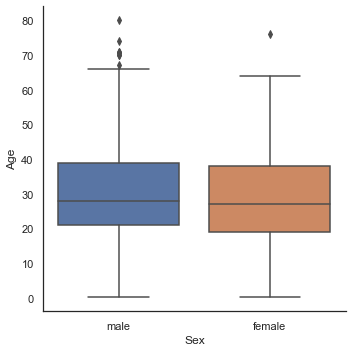

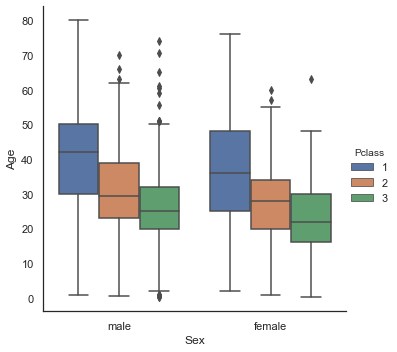

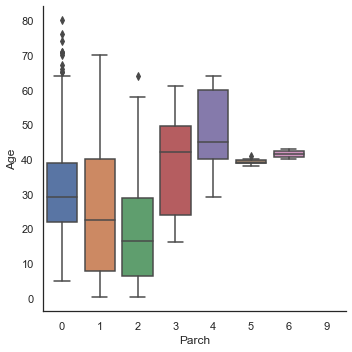

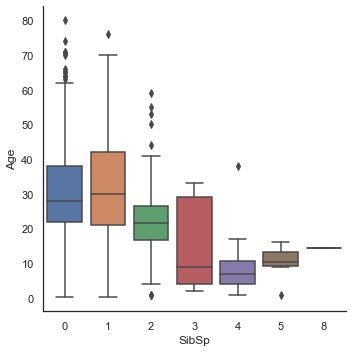

In [28]:
# Explore Age vs Sex, Parch , Pclass and SibSP
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")

Age distribution seems to be the same in Male and Female sub-populations, so there seems to be little relationship between Sex and Age.

However, there is a relationship between Pclass and Age. First class passengers are older than 2nd class passengers who are also older than 3rd class passengers.

Moreover, the more parents/children a passenger has, the older they are and the more siblings/spouses a passenger has, the younger they tend to be.

In [29]:
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

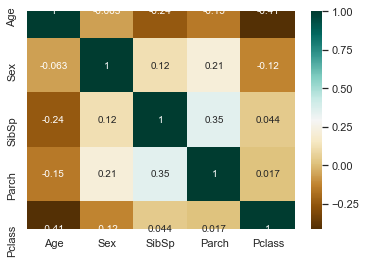

In [30]:
g = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

Age is not correlated with Sex, but is negatively correlated with Pclass, Parch and SibSp.

Overall, Pclass, Parch and SibSP seem to have the most consistent relationship to Age.

**The strategy is to fill in the missing Age values with the median age of similar rows according to Pclass, Parch and SibSp.**

In [31]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med



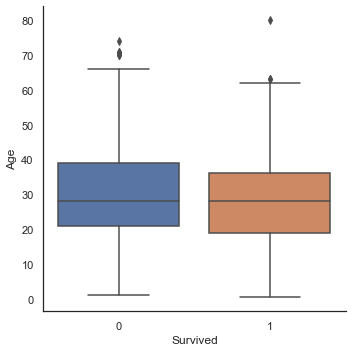

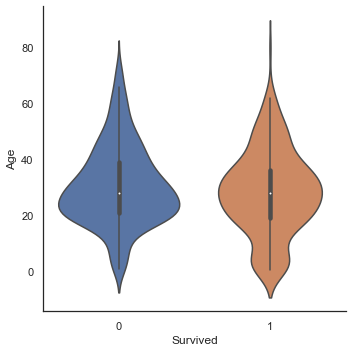

In [32]:
g = sns.factorplot(x="Survived", y = "Age",data = train, kind="box")
g = sns.factorplot(x="Survived", y = "Age",data = train, kind="violin")

No difference between median value of age in survived and not survived subpopulation. 

But in the violin plot of survived passengers, we still notice that very young passengers have higher survival rate.

<a id="featureeng"></a>
## 5. Feature engineering
<a id="name"></a>
### 5.1 Name/Title

In [33]:
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The Name feature contains information on passenger's title.

Since passengers with more distinguished titles may have recieved preferential treatment during the evacuation, we will add it to the model.

In [34]:
# Extract Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

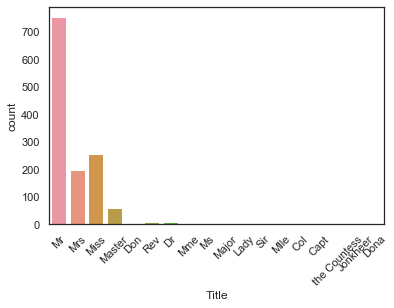

In [35]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

There is 17 titles in the dataset, most of them are very rare and we can group them in 4 categories.

In [36]:
# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

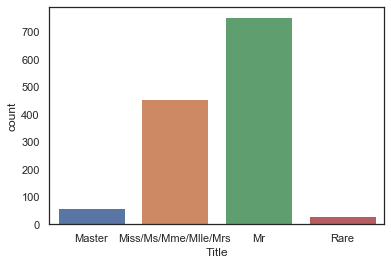

In [37]:
g = sns.countplot(dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

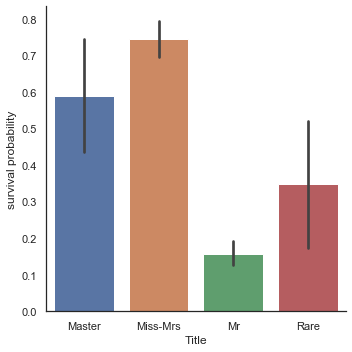

In [38]:
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

"Women and children first" seems to be true!

It is also interesting to note that passengers with rare titles have more chance to survive.

In [39]:
# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

<a id="family"></a>
### 5.2 Family size

We can imagine that large families will have more difficulties to evacuate, looking for theirs sisters/brothers/parents during the evacuation. So we chose to create an "Fsize" (family size) feature which is the sum of SibSp, Parch and 1 (to include the passenger, themselves).

In [40]:
# Create a family size descriptor from SibSp and Parch
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

In [41]:
dataset.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fsize
0,22.0,NaN,S,1.981001,0,1,3,0,1,0.0,A/5 21171,2,2
1,38.0,C85,C,4.266662,0,2,1,1,1,1.0,PC 17599,1,2
2,26.0,NaN,S,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,1,1
3,35.0,C123,S,3.972177,0,4,1,1,1,1.0,113803,1,2
4,35.0,NaN,S,2.085672,0,5,3,0,0,0.0,373450,2,1


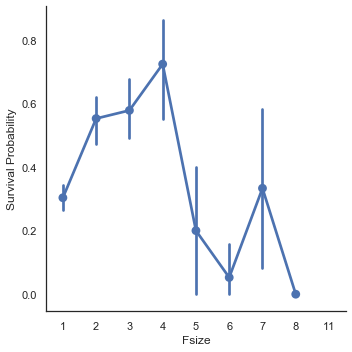

In [42]:
g = sns.factorplot(x="Fsize",y="Survived",data = dataset)
g = g.set_ylabels("Survival Probability")

The family size seems to play an important role, survival probability is worst for large families.

Let's create 4 categories of family size to use as features in our model.

In [43]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

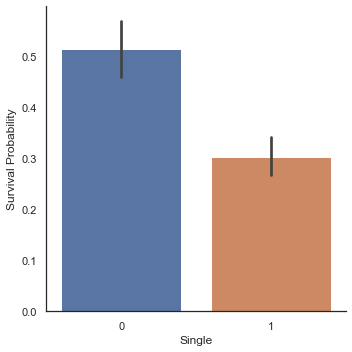

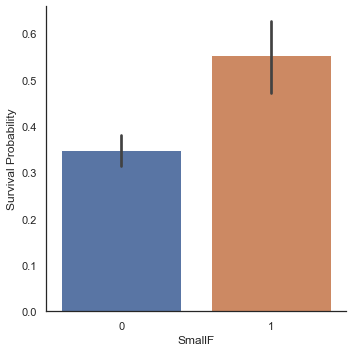

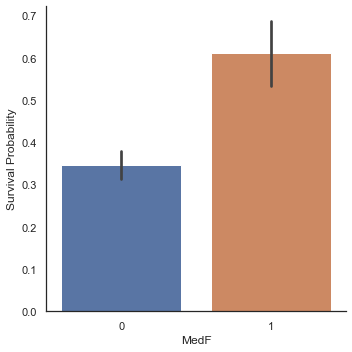

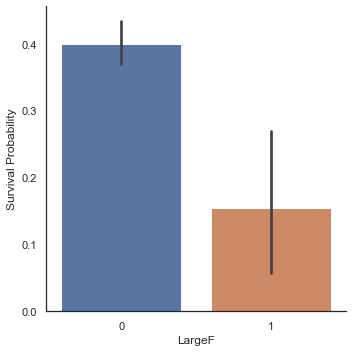

In [44]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

Small and Medium families have more chance to survive than single passenger and large families.

We want to use Title and Embarked in our model as well so let's use One-hot encoding to change them from categories to integers.

In [45]:
# On-Hot Encode Title and Embarked
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [46]:
dataset.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,22.0,NaN,1.981001,0,1,3,0,1,0.0,A/5 21171,...,1,0,0,0,0,1,0,0,0,1
1,38.0,C85,4.266662,0,2,1,1,1,1.0,PC 17599,...,1,0,0,0,1,0,0,1,0,0
2,26.0,NaN,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,...,0,0,0,0,1,0,0,0,0,1
3,35.0,C123,3.972177,0,4,1,1,1,1.0,113803,...,1,0,0,0,1,0,0,0,0,1
4,35.0,NaN,2.085672,0,5,3,0,0,0.0,373450,...,0,0,0,0,0,1,0,0,0,1


At this stage, we have 22 features.

<a id="cabin"></a>
### 5.3 Cabin

In [47]:
dataset["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [48]:
dataset["Cabin"].describe()

count     292
unique    186
top        G6
freq        5
Name: Cabin, dtype: object

In [49]:
dataset["Cabin"].isnull().sum()

1007

The Cabin feature column contains 292 values and 1007 missing values.

I assume that passengers without a cabin have a missing value displayed instead of the cabin number.

In [50]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [51]:
# Replace the Cabin number by the type of cabin 'X' if it is null
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

The first letter of the cabin indicates the Deck that the cabin is on.
Let's just use the deck rather than the individual cabin since it will likely generalize better.

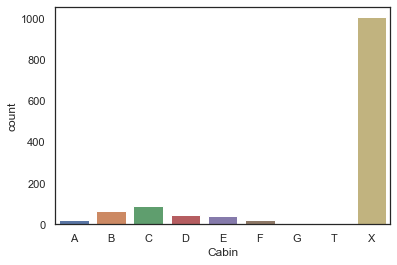

In [52]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

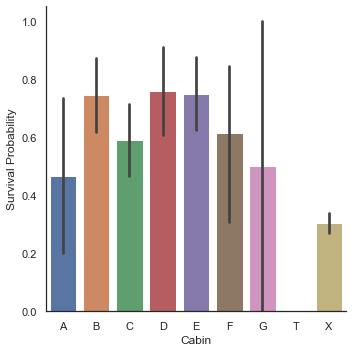

In [53]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")


Because of the low number of passenger that have records for on some decks, there seems to be a lot more variance in their survival rates.
This makes it hard to distinguish differences across some of the different decks. 

But we can see that passengers with a cabin have generally more chance to survive than passengers without (X).

In [54]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

<a id="ticket"></a>
### 5.4 Ticket

In [55]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Do tickets with similar prefixes have similar class and survival rates?**

Let's just use the prefix in the ticket to create a new feature.

In [56]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()


0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [57]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

**Let's finish converting the data by:**

* one-hot encoding Pclass
* dropping PassengerID
* dividing the data back into a "training" and "test" datasets
* extracting "Survived" out of training as the target feature

In [58]:
# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

In [59]:
# Drop useless variables 
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [60]:
dataset.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [61]:
## Separate train dataset and test dataset

train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

In [62]:
## Separate train features and label 
train["Survived"] = train["Survived"].astype(int)

Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

<a id="models"></a>
## 6. Single Models
<a id="createmodels"></a>
### 6.1 Create Models


We are going to look at 10 popular classifiers to create our model. We will use stratified kfold cross validation to train them and then see how accurate they are across all of the validation runs.

The classifier models are:
* SVC
* Decision Tree
* AdaBoost 
* Random Forest
* Extra Trees
* Gradient Boosting
* Multiple layer perceprton (neural network)
* KNN
* Logistic regression
* Linear Discriminant Analysis

In [63]:
# Create a list of the classifier objects
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())


<a id="cv"></a>
### 6.2 Cross-validate the models

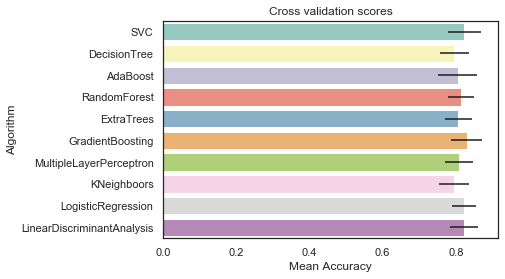

In [64]:
# Run each model using kfold cross validation with 10 folds
kfold = StratifiedKFold(n_splits=10)

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


Let's see if we can tune the SVC, AdaBoost, RandomForest , ExtraTrees and the GradientBoosting classifiers to get better forecasts

<a id="ht"></a>
## 6.3 Hyper-parameter tuning 

Here we do a grid search across common parameter settings for the AdaBoost, ExtraTrees, RandomForest, GradientBoosting and SVC classifiers.

These algorithms support parallelization. You can use the "n_jobs" parameter to control this.
Most modern computers have at least 4 cores so we set it to 4.


In [65]:
# Adaboost on a decision tree
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 892 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    3.2s finished


In [66]:
gsadaDTC.best_score_

0.8240635641316686

In [67]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   22.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   33.3s finished


0.8297389330306469

In [68]:
# RFC Parameters tuning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   25.1s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   38.4s finished


0.8331441543700341

In [69]:
# Gradient boosting tuning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   30.0s finished


0.8331441543700341

In [70]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   28.1s finished


0.8331441543700341

<a id="lc"></a>
## 6.4 Plot learning curves

Learning curves are a good way to see the the effect of the training size on the accuracy and to look for overfitting.

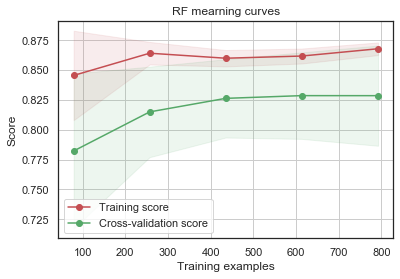

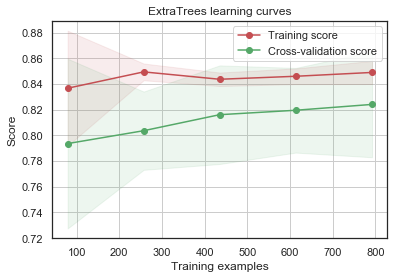

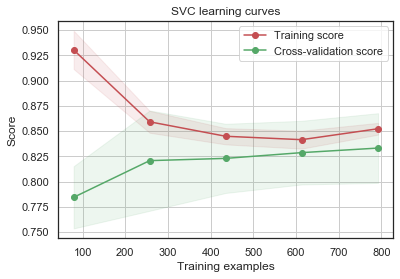

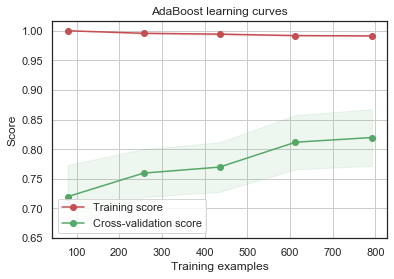

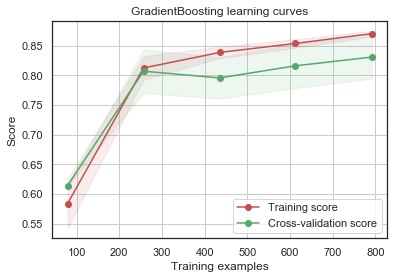

In [71]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)



GradientBoosting and Adaboost classifiers tend to overfit the training set. 

Since the learning curves are continuing to grow, they would likely perform better if we added more data.

SVC and ExtraTrees classifiers seem to better generalize the prediction since the training and cross-validation curves are close together.

<a id="fi"></a>
## 6.5 Feature importance

Let's take a quick look to see which features had the biggest impact on passenger survival.

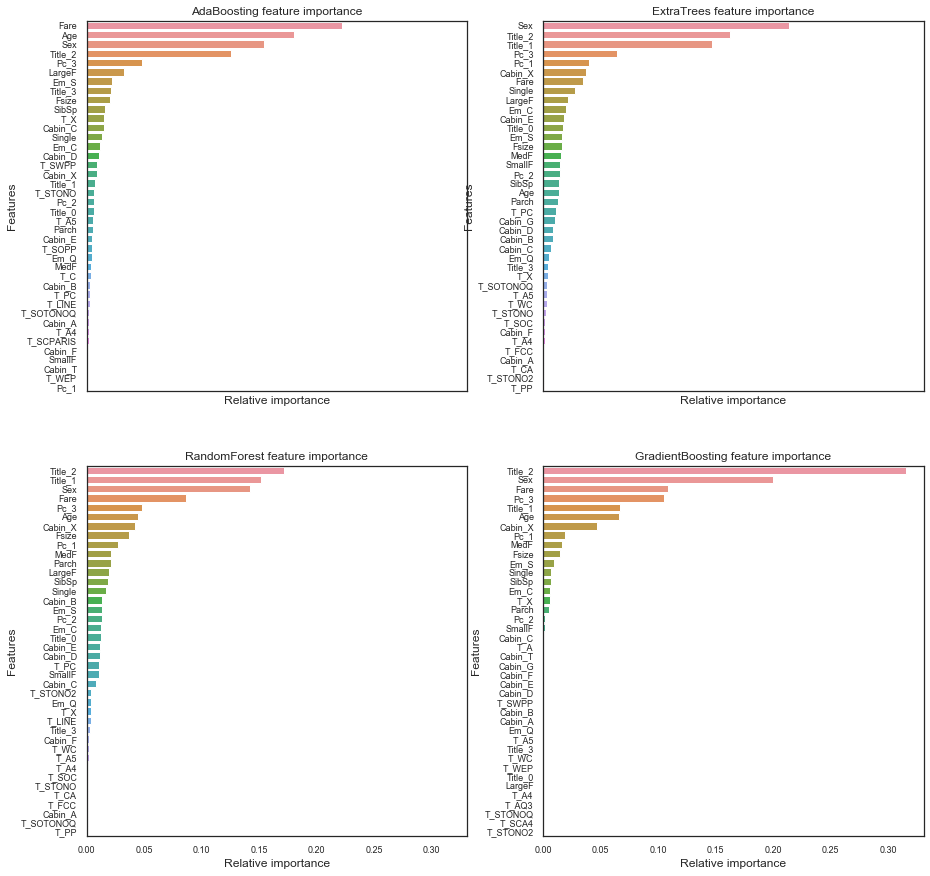

In [72]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

As you can see, the different classifiers identified slightly different features as being important.

Overall though, it is pretty clear that Sex, social status (through Title, Fare & deck) and Age are important predic

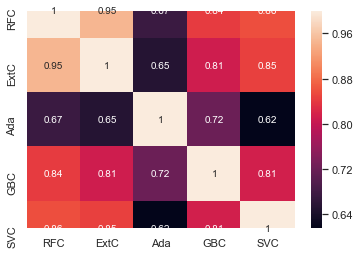

In [73]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
tree_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(tree_results.corr(),annot=True)

The predictions seem to be quite similar for the 5 classifiers except for Adaboost.
There does appear to be enough difference between the 5 classifier predictions to consider ensembling the models. 

<a id="ensemble"></a>
### 7 Ensemble model
#### 7.1 Soft Voting model

Soft Voting essentially takes the prediction from each model and then weights it by its probability condtribution to the final ensemble prediction. 

In [74]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

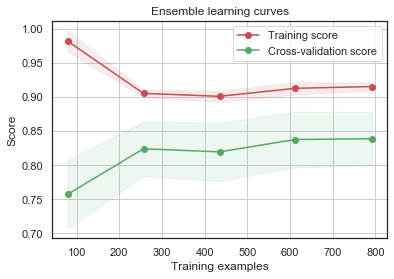

In [75]:
g = plot_learning_curve(votingC,"Ensemble learning curves",X_train,Y_train,cv=kfold)

<a id="pred"></a>
### 8. Prediction
#### 8.1 Predict on test data with the ensemble model

In [76]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)